## Разведочный анализ данных (EDA). Классификация. Логистическая регрессия

**Цель работы** — изучить подход к решения реальных задач МО:
    - научиться использовать подход — построение базовых моделей (baseline)
    - улучшить навыки разведочного анализа данных и подготовки данных
    - научиться строить и анализировать вероятностные модели классификации

Решите задачу классификации. Используйте google colab, аналогичный сервис или jupyter notebook.

Целевая переменная приведена в последней колонке в файле `cleve.mod`. Значение `H` - пациент здоров, другие значения - пациент болен.

0. Приведите ссылку на задание, текст задания в коде (ipynb файле)
1. Загрузите датасет https://github.com/ivtipm/ML/blob/main/datasets/classification/heart_disease.zip
   Удобнее всего загружать так:
   ```
   pd.read_csv("cleve.mod", delim_whitespace=True, skiprows=20, header=None)
   # delim_whitespace=True столбцы разделены одним или несколькими пробелами
   # header=None - заголовок таблицы отсутствует
   # skiprows=20 - пропустить 20 строк, в которых содержится описание данных
   ```
   Описание датасета: https://archive.ics.uci.edu/dataset/45/heart+disease

   Или предложите свой датасет, сопоставимый по количеству и качеству данных с рекомендованным. Используйте свой датасет после согласования с преподавателем.
1. Реализуйте быстрое базовое решение (**baseline**):
    - сделайте целевой признак числовым
    - отбросьте все остальные нечисловые признаки
    - на полученном множестве признаков обучите модель логистической регрессии, оцените качество на тестовой выборке. Получилась ли модель удовлетворительного качества?
    - сохраните это решение. После выполнения второй части работы сравните качество финально модели с базовой.

1. Проведите **разведочный анализ данных**.
    - 7 point summary,
    - баланс классов,
    - Пропуски, дубликаты,
    - диаграммы рассеяния (pairplot), цветом показывайте значение целевого признака; можно ли на диаграммах провести разделяющую прямую между объектами разных классов?
    - диаграммы размаха, скрипичные диаграммы (violin plot),
    - матрица корреляции,
    - Интерактивные диаграммы на основе plotly.
    - Сделайте резюме по данным: опишите признаки, количество объектов, выбросы, пропуски, важные для предсказания признаки (Какие признаки сильнее всего влияют на целевой признак?). Какие распределения имеют признаки (нормальное, равномерное и т.п.)? Дополните резюме по желанию.
    - запишите несколько запросов к таблице с данными: простой запрос с фильтром, с составным условием, с отбором столбцов
    - выполните 2-3 группировки, в том числе группировки по нескольким критериям
1. **Подготовьте данные**:
    - удалите выбросы и дубликаты
    - Закодируйте категориальные признаки (используйте числовое и one-hot кодирование)
    - Масштабируйте признаки
    - Объясняйте действия, описывайте зачем их выполняете.
    - Пример: https://colab.research.google.com/drive/1S1pylOPMxXIwRRVtl6vxSNAtwTBvKDcZ
1. **Обучите модель** логистической регрессии. Приведите общую формулу, пояснения для неё.
1. **Оцените модель** на отложенной выборке (используйте `test_train_split`) и c помощью кросс-валидации.
Вычислите accuracy (общую точность), точность (precision), recall (полноту), меру f1. Опишите эти показатели.
Постройте матрицу ошибок. Используйте classification_report для получения метрик качества модели.
1. **Поэкспериментируйте** с процедурой обработки данных. Удаляйте лишние столбцы, модифицируйте колонки, удаляйте выбросы и т.п. Обучайте модель после каждого эксперимента. Записывайте как каждый этап влияет на качество модели.
1. Если признаки имеют примерно одинаковую шкалу (минимумы и максимумы признаков отличаются на несколько процентов, или стандартные отклонения и средние значения признаков отличаются на несколько процентов), то опишите **важность признаков**, на основе коэффициентов регрессии. Сравните это с важностью признаков, оцененной на основе коэффициента корреляции.
1. *Бонус: используйте Weight and Biases (wandb), MLflow и другие средства для **отслеживания экспериментов*** [github.com/ivtipm/ML/blob/main/plans/AI_intro_2025/2025_ML_intro.md](https://github.com/ivtipm/ML/blob/main/plans/AI_intro_2025/2025_ML_intro.md)
1. **Рефлексия**.
    - Какие шаги анализа и обработки наиболее сильно повлияли на качество модели?
    - Требуется ли ли перекрёстная проверка модели?
    - По желанию опишите свой опыт: с какими трудностями столкнулись и как их преодолели.


1. Создайте пайплайн (sklearn pipeline, [пример](https://colab.research.google.com/drive/1S1pylOPMxXIwRRVtl6vxSNAtwTBvKDcZ)) для обработки данных. Добавьте в него модель. Сохраните пайплайн. Постройте веб-сервис на gradio и API сервер на основе полученного пайплайна. См. аналогичное задание по Языкам программирования для МО.
Интерфейсы сервисов должны позволять ввести значения признаков, получить вероятности классов.

# Baseline решение

## Загрузка данных

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    "cleve.mod",
    delim_whitespace=True,
    skiprows=20,
    header=None
)

df


C:\Users\olegr\AppData\Local\Temp\ipykernel_16196\2378238878.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff,H
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff,H
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick,S1
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff,H


In [16]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "num", "target"
]

df.columns = columns
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff,H
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff,H
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick,S1
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff,H


## Преобразование данных

Преобразуем признак sex, fbs, restecg, exang в бирнарном числовом формате


Так же с целевой переменной
0 - отстутствие заболевания 
1 - наличие заболевания

In [17]:
# # df['sex_is_male'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
# df['sex'] = (df['sex'] == 'male').astype(int)
# df['fbs'] = (df['fbs'] == 'true').astype(int)
# df['restecg'] = (df['restecg'] == 'hyp').astype(int)
# df['exang'] = (df['exang'] == 'fal').astype(int)

# df['target'] = df['num'].apply(lambda x: 1 if x=='sick' else 0)
df['target'] = (df['num'] != 'buff').astype(int)


df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,0
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,1
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,0
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff,0
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff,0
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick,1
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff,0


In [18]:
# Отсавляем только числовые признаки

numeric_features = df.select_dtypes(include=["int", "float"])


y = df["target"]
X = numeric_features.drop(columns=["target"])

X

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4
...,...,...,...,...,...
298,48.0,124.0,255.0,175.0,0.0
299,57.0,132.0,207.0,168.0,0.0
300,49.0,118.0,149.0,126.0,0.8
301,74.0,120.0,269.0,121.0,0.2


## Обучение базовой модели

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


model_baseline = LogisticRegression(max_iter=1000)
model_baseline.fit(X_train, y_train)

y_pred = model_baseline.predict(X_test)

accuracy_score(y_test, y_pred)
# model_baseline.coef_

0.6842105263157895

# Анализ

## Разведочный анализ данных (EDA)

In [20]:
#7 point summary

df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])


,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.455446
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
5%,39.100000,108.000000,175.000000,108.100000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
95%,68.000000,160.000000,326.900000,181.900000,3.400000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [21]:
df["target"].value_counts(normalize=True)


target
0    0.544554
1    0.455446
Name: proportion, dtype: float64

баланс хорший acuraccy можно смотреть

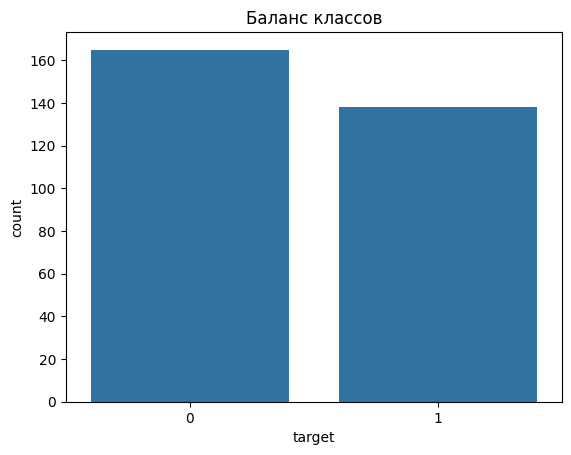

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="target", data=df)
plt.title("Баланс классов")
plt.show()


In [37]:
df.replace("?", np.nan, inplace=True)

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
num         0
target      0
dtype: int64

Чо

In [38]:
df.duplicated().sum()

1

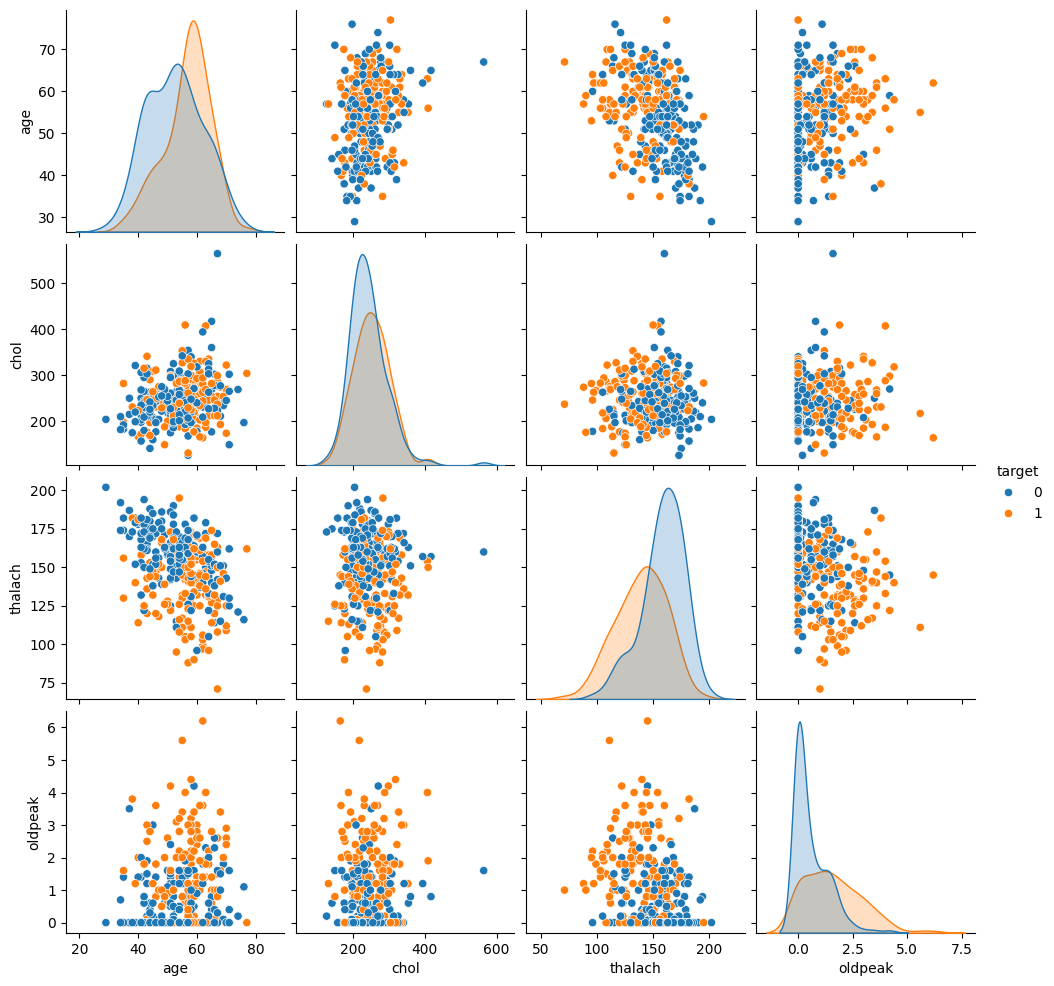

In [40]:
sns.pairplot(
     df[["age", "chol", "thalach", "oldpeak", "target"]],
    # df[["age", "sex", "fbs", "restecg", "exang", "target"]],
    hue="target"
)
plt.show()

Можно ли визуально провести разделяющую границу? Частично — да, особенно по thalach, oldpeak

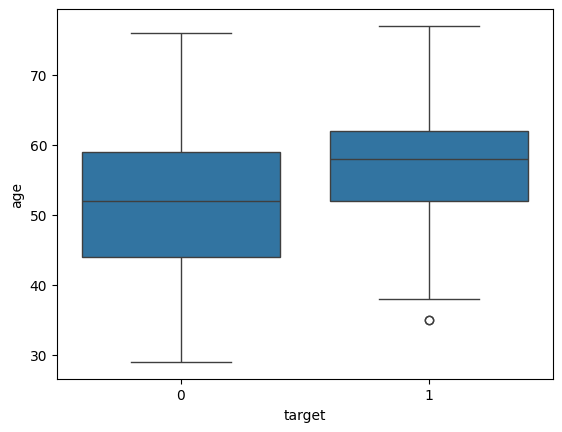

In [41]:
sns.boxplot(x="target", y="age", data=df)
plt.show()


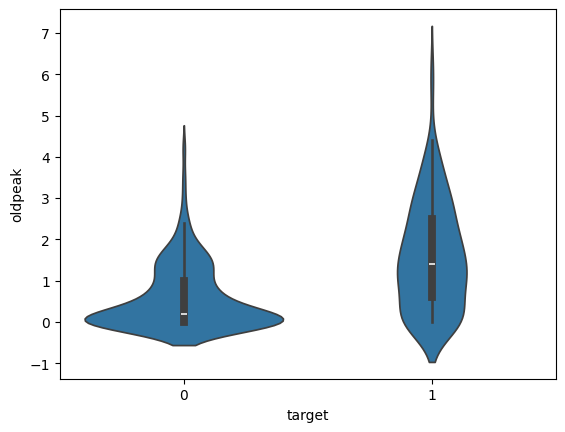

In [42]:
sns.violinplot(x="target", y="oldpeak", data=df)
plt.show()


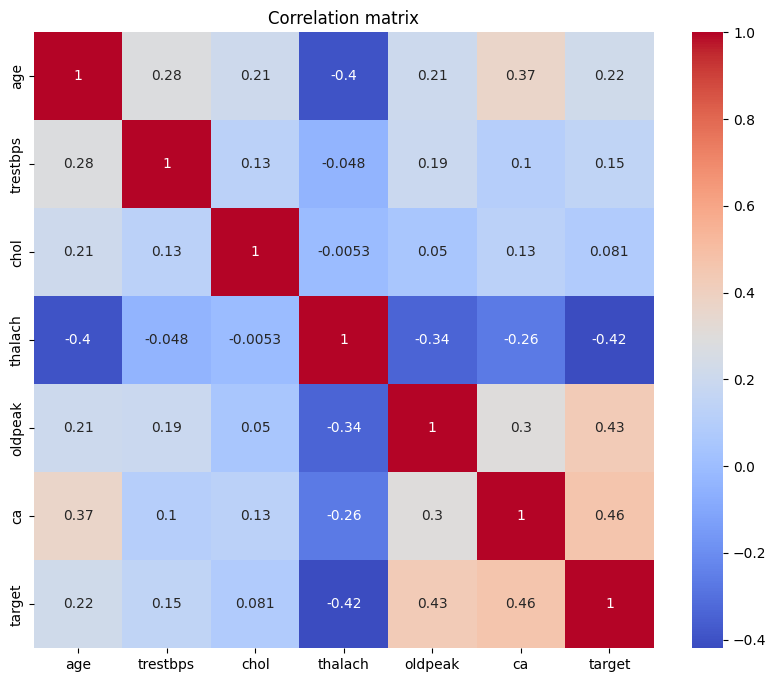

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=["int", "float"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


In [66]:
import plotly.express as px

fig = px.scatter(
    df,
    x="age",
    y="thalach",
    color="target",
    title="Age vs Thalach"
)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

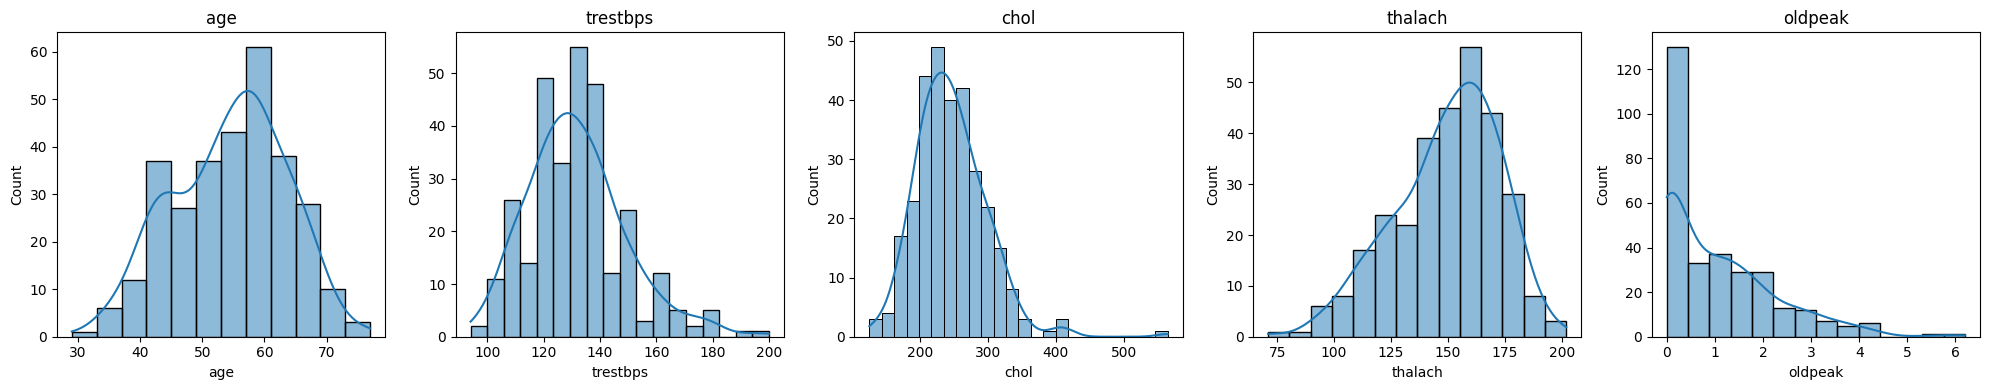

In [46]:
# Апроксимация
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 ряд, 5 колонок

for ax, col in zip(axes, num_features):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


### Резюме по данным
- Количество объектов: 303
- Целевая переменная: бинарная
- Пропуски не обнаружены
- Наиболее информативные признаки: `thalach`, `exang`, `oldpeak`, `sex`

Признак `age` имеет распределение, близкое к нормальному.
Признаки `chol` и `oldpeak` характеризуются правосторонним скошенным распределением.
Признак `thalach` имеет асимметричное распределение с выраженным максимумом.
Категориальные признаки (`sex`, `cp`, `thal`, `slope`) имеют дискретное распределение.


### Запросы к данным

In [48]:
# по возарсту старше 60
df[df["age"] > 60][["age", "chol", "target"]]

,age,chol,target
0,63.0,233.0,0
1,67.0,286.0,1
2,67.0,229.0,1
6,62.0,268.0,1
8,63.0,254.0,1
...,...,...,...
284,62.0,209.0,0
291,61.0,166.0,1
293,68.0,277.0,0
295,77.0,304.0,1


In [49]:
df[(df["sex"] == "male") & (df["chol"] >200)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,0
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,1
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,0
5,56.0,male,abnang,120.0,236.0,fal,norm,178.0,fal,0.8,up,0.0,norm,buff,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,42.0,male,asympt,136.0,315.0,fal,norm,125.0,true,1.8,flat,0.0,fix,sick,1
293,68.0,male,notang,118.0,277.0,fal,norm,151.0,fal,1.0,up,1.0,rev,buff,0
295,77.0,male,asympt,125.0,304.0,fal,hyp,162.0,true,0.0,up,3.0,norm,sick,1
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff,0


In [50]:
df.groupby("target")["chol"].mean()

target
0    242.230303
1    251.086957
Name: chol, dtype: float64

In [51]:
df.groupby(["sex", "target"])["thalach"].mean()

sex   target
fem   0         154.027778
      1         142.416667
male  0         161.903226
      1         138.403509
Name: thalach, dtype: float64

## Подготвока данных

In [52]:
df = df.drop_duplicates()

In [53]:
df["thal"].unique()

array(['fix', 'norm', 'rev', nan], dtype=object)

In [54]:
# Заполнение пропусков

df["ca"] = pd.to_numeric(df["ca"])


df["ca"] = df["ca"].fillna(df["ca"].median())
df["thal"] = df["thal"].fillna(df["thal"].mode()[0])


C:\Users\olegr\AppData\Local\Temp\ipykernel_16196\3741394539.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\olegr\AppData\Local\Temp\ipykernel_16196\3741394539.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\olegr\AppData\Local\Temp\ipykernel_16196\3741394539.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [55]:
# Кодирование категориальных признаков

categorical = ["sex", "fbs", "restecg", "exang", "slope", "thal"]
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)
df_encoded = df_encoded.drop(columns=["cp", "num", 'restecg_norm', 'slope_up', 'thal_norm'])
df_encoded

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_male,fbs_true,restecg_hyp,exang_true,slope_flat,thal_rev
0,63.0,145.0,233.0,150.0,2.3,0.0,0,True,True,True,False,False,False
1,67.0,160.0,286.0,108.0,1.5,3.0,1,True,False,True,True,True,False
2,67.0,120.0,229.0,129.0,2.6,2.0,1,True,False,True,True,True,True
3,37.0,130.0,250.0,187.0,3.5,0.0,0,True,False,False,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0.0,0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,124.0,255.0,175.0,0.0,2.0,0,True,True,False,False,False,False
299,57.0,132.0,207.0,168.0,0.0,0.0,0,True,False,False,True,False,True
300,49.0,118.0,149.0,126.0,0.8,3.0,1,True,False,True,False,False,False
301,74.0,120.0,269.0,121.0,0.2,1.0,0,False,False,True,True,False,False


In [56]:
# Считаем выбросы по правилу 1.5*IQR
def remove_outliers(df, numeric_cols):
    df_clean = df.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Считаем количество выбросов
        n_outliers = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
        print(f"{col}: {n_outliers} выбросов")
        # Удаляем выбросы
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()

df_encoded = remove_outliers(df_encoded, numeric_cols)


age: 0 выбросов
trestbps: 9 выбросов
chol: 5 выбросов
thalach: 1 выбросов
oldpeak: 4 выбросов
ca: 16 выбросов


In [57]:
# Масштабирование признаков

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df_encoded.drop(columns=["target"])
y = df_encoded["target"]

X_scaled = scaler.fit_transform(X)
X_scaled_test = scaler.fit_transform(X_test)
# X_scaled = X

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_true,restecg_hyp,exang_true,slope_flat,thal_rev
0,1.035088,1.013717,-0.190273,-0.043204,1.318542,-0.696039,0.671630,2.574601,1.057850,-0.677507,-0.896691,-0.749269
1,1.479231,-0.623882,-0.280911,-0.978522,1.609333,2.098585,0.671630,-0.388410,1.057850,1.475998,1.115212,1.334635
2,-1.851846,0.031157,0.194940,1.604737,2.481706,-0.696039,0.671630,-0.388410,-0.945313,-0.677507,-0.896691,-0.749269
3,-1.407703,0.031157,-0.847401,0.936652,0.446170,-0.696039,-1.488915,-0.388410,1.057850,-0.677507,-0.896691,-0.749269
4,0.257836,-0.623882,-0.122294,1.203886,-0.135412,-0.696039,0.671630,-0.388410,-0.945313,-0.677507,-0.896691,-0.749269
...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.479908,-1.933962,0.149621,-1.290295,0.058449,-0.696039,-1.488915,-0.388410,1.057850,-0.677507,1.115212,-0.749269
263,-0.630451,-0.361867,0.308239,1.070269,-0.910854,2.098585,0.671630,2.574601,-0.945313,-0.677507,-0.896691,-0.749269
264,0.368872,0.162165,-0.779422,0.758497,-0.910854,-0.696039,0.671630,-0.388410,-0.945313,1.475998,-0.896691,1.334635
265,2.256483,-0.623882,0.625473,-1.334834,-0.716994,0.701273,-1.488915,-0.388410,1.057850,1.475998,-0.896691,-0.749269


## Обучение #2

In [69]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

new_model = LogisticRegression(max_iter=1000)
new_model.fit(X_train, y_train)

y_pred = new_model.predict(X_scaled_test)

# print(classification_report(y_test, y_pred))

# accuracy_score(y_test, y_pred)


ValueError: Found input variables with inconsistent numbers of samples: [267, 302]

In [ ]:
# Важность признаков
importance = pd.Series(
    new_model.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

importance.head(10)


NameError: name 'new_model' is not defined

# Pipeline

In [60]:
from sklearn.model_selection import train_test_split



X = df.drop(columns=["num", "target"])
y = df["target"]


cat_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
num_features = [c for c in X.columns if c not in cat_features]


X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm


In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        # числовые -> масштабируем
        ("num", StandardScaler(), num_features),
        # категориальные -> one-hot
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)
    ]
)
preprocessor


,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]
)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)


0.8289473684210527

In [64]:
import joblib

joblib.dump(pipe, "heart_disease_pipeline.pkl")


['heart_disease_pipeline.pkl']